In [1]:
###Instructions

####1.Import the necessary libraries if you are starting a new notebook.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import os #we will use the function listdir to list files in a folder
import math #to apply absolute value
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
####2.Load the csv. Use the variable customer_df as customer_df = pd.read_csv().

customer_df=pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
###What should we do with the customer_id column?
### Drop or use as index
customer_df.set_index('Customer', inplace=True)



In [4]:
customer_df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
customer_df.columns =[col_name.lower().replace(' ', '_') for col_name in customer_df.columns]
customer_df.columns #formatting the column names as necessary

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'effective_to_date', 'employmentstatus', 'gender', 'income',
       'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [6]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date']).dt.to_period('M')
customer_df['effective_to_date']

Customer
BU79786    2011-02
QZ44356    2011-01
AI49188    2011-02
WW63253    2011-01
HB64268    2011-02
            ...   
LA72316    2011-02
PK87824    2011-02
TD14365    2011-02
UP19263    2011-02
Y167826    2011-02
Name: effective_to_date, Length: 9134, dtype: period[M]

In [7]:
###3.Load the continuous and discrete variables into numericals_df and categorical_df variables, for eg.:
###numerical_df = customer_df.select_dtypes()
###categorical_df = customer_df.select_dtypes()

numerical_df= customer_df.select_dtypes(np.number)
categorical_df= customer_df.select_dtypes(np.object)

numerical_df.head() ###preview


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
Customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879


In [8]:
categorical_df.head() ###preview

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [9]:
####4.Plot every categorical variable. What can you see in the plots? 
####Note that in the previous lab you used a bar plot to plot categorical data, with each unique category in the 
###column on the x-axis and an appropriate measure on the y-axis. 
####However, this time you will try a different plot. This time in each plot for the categorical variable you will have
####each unique category in the column on the x-axis and the target(which is numerical) on the Y-axis


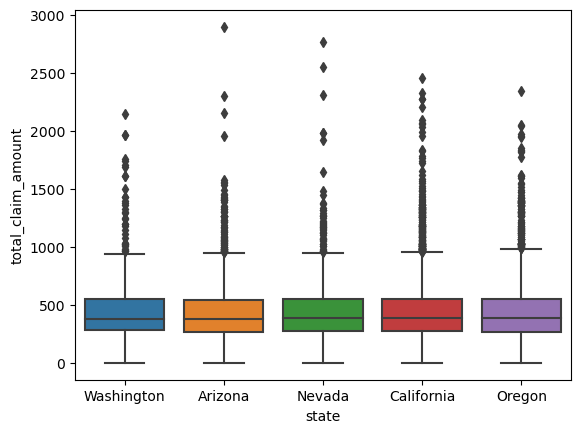

In [10]:
sns.boxplot(x="state", y="total_claim_amount", data=customer_df)
plt.show()



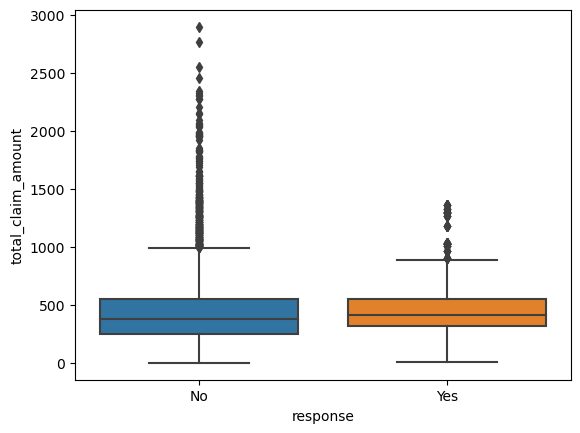

In [11]:
sns.boxplot(x="response", y="total_claim_amount", data=customer_df)
plt.show()

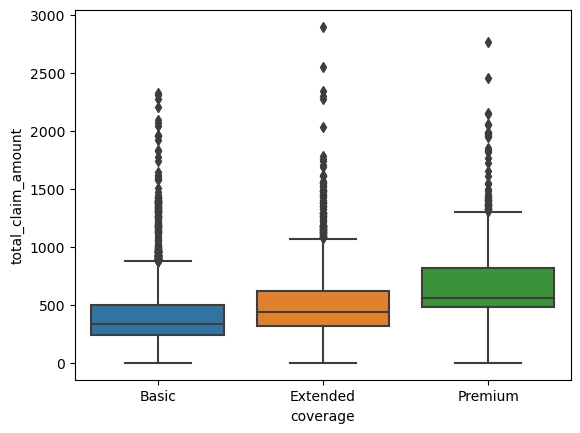

In [12]:
sns.boxplot(x="coverage", y="total_claim_amount", data=customer_df)
plt.show()

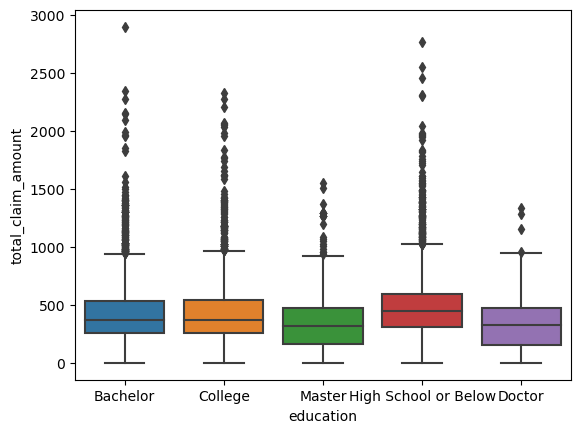

In [13]:
sns.boxplot(x="education", y="total_claim_amount", data=customer_df)
plt.show()

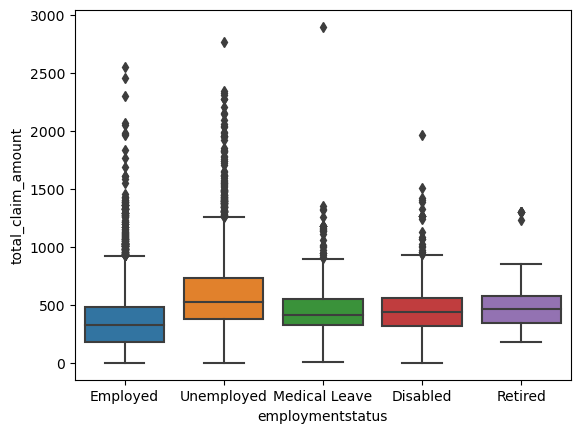

In [15]:
sns.boxplot(x="employmentstatus", y="total_claim_amount", data=customer_df)
plt.show()

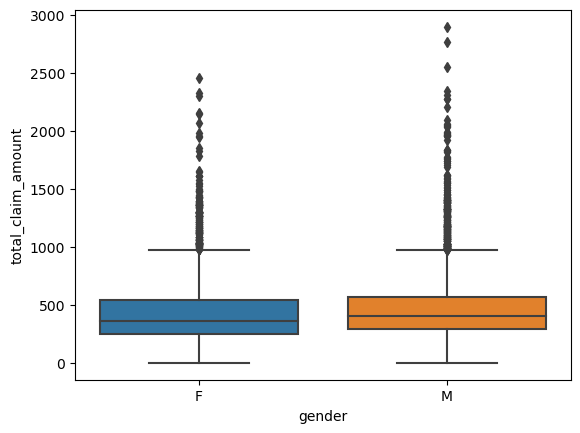

In [16]:
sns.boxplot(x="gender", y="total_claim_amount", data=customer_df)
plt.show()

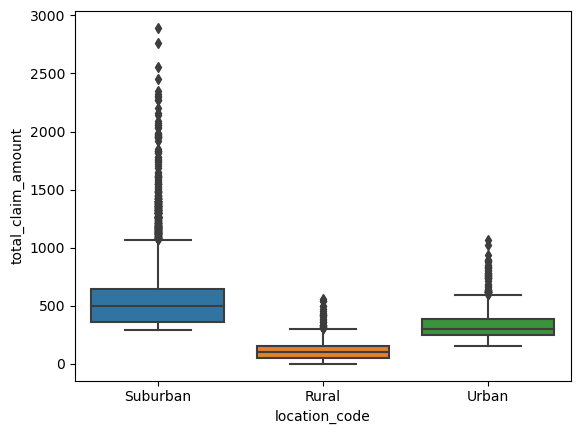

In [17]:
sns.boxplot(x="location_code", y="total_claim_amount", data=customer_df)
plt.show()

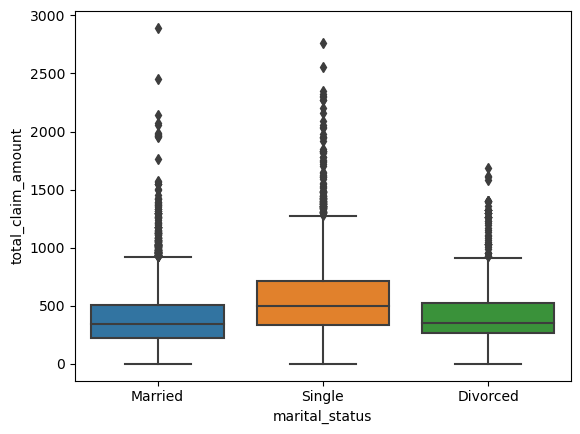

In [18]:
sns.boxplot(x="marital_status", y="total_claim_amount", data=customer_df)
plt.show()

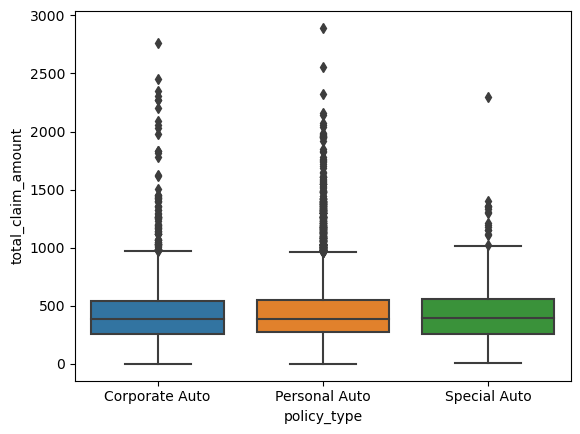

In [19]:
sns.boxplot(x="policy_type", y="total_claim_amount", data=customer_df)
plt.show()

<AxesSubplot:xlabel='policy', ylabel='total_claim_amount'>

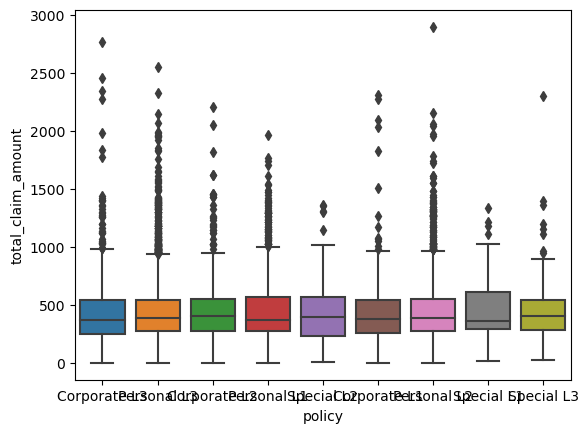

In [25]:
sns.boxplot(x="policy", y="total_claim_amount", data=customer_df)

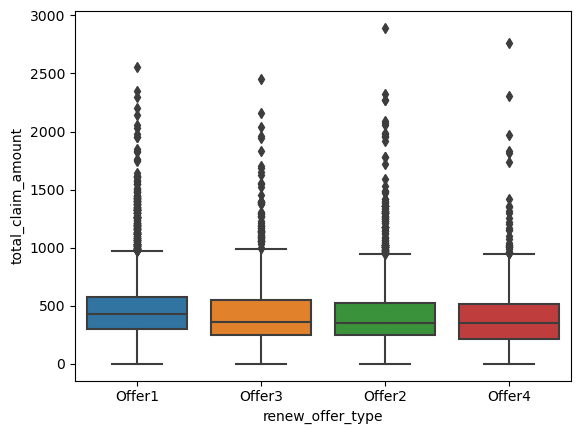

In [21]:
sns.boxplot(x="renew_offer_type", y="total_claim_amount", data=customer_df)
plt.show()

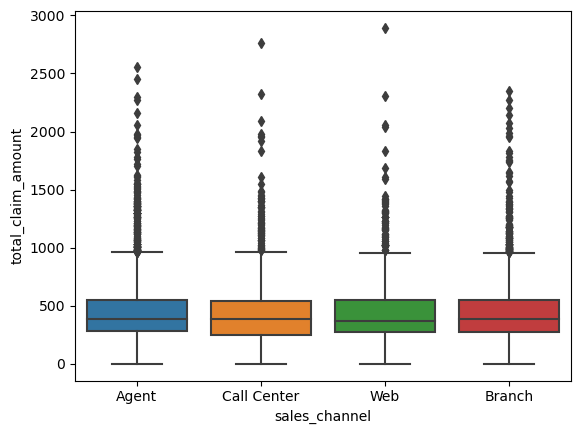

In [26]:
sns.boxplot(x="sales_channel", y="total_claim_amount", data=customer_df)
plt.show()

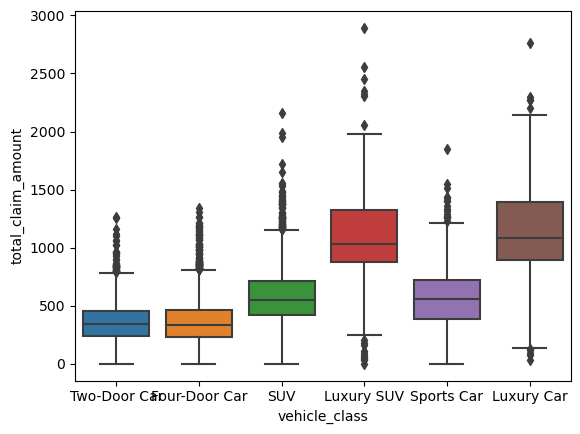

In [27]:
sns.boxplot(x="vehicle_class", y="total_claim_amount", data=customer_df)
plt.show()

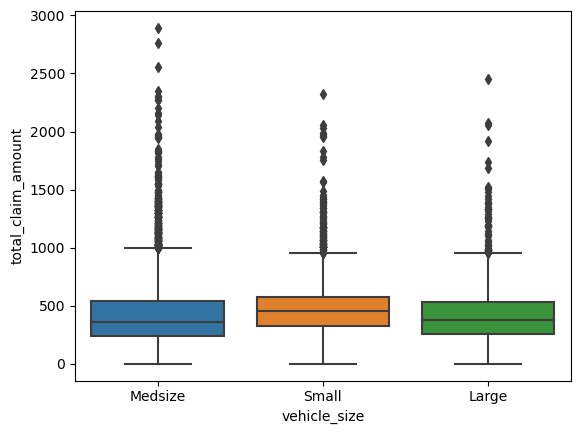

In [28]:
sns.boxplot(x="vehicle_size", y="total_claim_amount", data=customer_df)
plt.show()

In [14]:
####For the categorical data, check if there is any data cleaning that need to perform. 
####Hint: You can use the function value_counts() on each of the categorical columns and check the representation of different categories in each column. 
###Discuss if this information might in some way be used for data cleaning.

In [32]:
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
Customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [30]:
categorical_df['state'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

In [34]:
categorical_df['response'].value_counts()

No     7826
Yes    1308
Name: response, dtype: int64

In [35]:
categorical_df['coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [36]:
categorical_df['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [37]:
categorical_df['employmentstatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [38]:
categorical_df['gender'].value_counts()  

F    4658
M    4476
Name: gender, dtype: int64

In [39]:
categorical_df['location_code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

In [40]:
categorical_df['marital_status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

In [41]:
categorical_df['policy_type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [42]:
categorical_df['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [43]:
categorical_df['renew_offer_type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [44]:
categorical_df['sales_channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [45]:
categorical_df['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [46]:
categorical_df['vehicle_size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [49]:
categorical_df.isna().sum()

state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [ ]:
####Observation: No data cleaning is necessary at this point, although the information can be used to: 1. detect overlapping or redundant categories 2. whether the variable has been attributed to the wrong data type 3.Whether there may be some categories that need further clarification 4. Check foer null values 5. Mislabelling 